# Detecció de bitllets falsos

L'objectiu es distingir quins bitllets de 10 dólars són verdaders i quins són falsos. Per fer-ho, disposem d'un *dataset* on tenim 4 característiques estadístiques de cada bitllet. Aquestes són: **variança, asimetria, curtosi i entropia**. Aquestes característiques es calculen aplicant operacions matemàtiques sobre les imatges dels bitllets. També disposem d'una etiqueta que ens diu si aquest bitllet és **real(0)** o **fals(1)**.

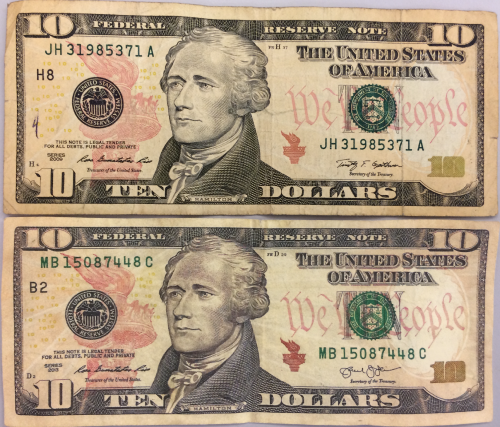

**Pregunta:** De quin tipus de problema es tracta?

In [ ]:
# Importa les llibreries necessàries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

# Importa el dataset
banknotes = pd.read_csv('./banknotes.csv')

# Mostra quin és el nombre total de dades de les que disposem
display(banknotes.shape)

# Mostra quants bitllets de cada classe tenim
display(banknotes['class'].value_counts())

# Mostra el màxim, mínim i mitjana del conjunt de dades característiques dels bitllets
display(banknotes.describe())


(1372, 5)

0    762
1    610
Name: class, dtype: int64

,variace,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
# Divideix el dataset en dades d'entrenament i dades de validació de manera que les
# dades d'entrenament representin aproximadament el 80% del total de dades.
from sklearn.model_selection import train_test_split
possibilities = banknotes['class']

# Hauríem d'obtenir les variables X_train, y_train, X_test, y_test
x_train, y_train, x_test, y_test = train_test_split(banknotes, possibilities, train_size=0.8, test_size=0.2, random_state=0, shuffle=True, stratify=None)

print('Número de bitllets reals i falsos a les dades d\'entrenament x:')
display(x_train['class'].value_counts())
print('Número de bitllets reals i falsos a les dades d\'entrenament y:')
display(y_train['class'].value_counts())



Número de bitllets reals i falsos a les dades d'entrenament x:


0    605
1    492
Name: class, dtype: int64

Número de bitllets reals i falsos a les dades d'entrenament y:


0    157
1    118
Name: class, dtype: int64

In [ ]:
# Crea una xarxa neuronal de tipus Dense amb 4 neurones a la capa d'entrada i
# 1 única neurona com a capa de sortida amb funció d'activació sigmoid. Compila
# el model escollint la funció de pèrdua i optimitzador més adient. Finalment 
# mostra el resum
from keras.models import Sequential
from keras.layers import Dense

banknoteDetecionModel = Sequential()

banknoteDetecionModel.add(Dense(4, activation='sigmoid'))
banknoteDetecionModel.add(Dense(1, activation='sigmoid'))

banknoteDetecionModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Entrena i evalua el model obtingut
banknoteDetecionModel.fit(x_train, x_test, epochs=10, verbose=1)

Epoch 1/10
35/35 [==============================] - 1s 2ms/step - loss: 0.8091 - accuracy: 0.4686
Epoch 2/10
35/35 [==============================] - 0s 2ms/step - loss: 0.7668 - accuracy: 0.5169
Epoch 3/10
35/35 [==============================] - 0s 2ms/step - loss: 0.7313 - accuracy: 0.5670
Epoch 4/10
35/35 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.6089
Epoch 5/10
35/35 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.6582
Epoch 6/10
35/35 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.6919
Epoch 7/10
35/35 [==============================] - 0s 2ms/step - loss: 0.6305 - accuracy: 0.7201
Epoch 8/10
35/35 [==============================] - 0s 2ms/step - loss: 0.6079 - accuracy: 0.7767
Epoch 9/10
35/35 [==============================] - 0s 2ms/step - loss: 0.5847 - accuracy: 0.8323
Epoch 10/10
35/35 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.8943


In [ ]:
test_loss, test_acc = banknoteDetecionModel.evaluate(y_train, y_test)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

9/9 [==============================] - 0s 2ms/step - loss: 0.5570 - accuracy: 0.9018
test_loss: 0.5570001006126404
test_acc: 0.9018181562423706


In [ ]:
# Realitza la predicció d'un bitllet del dataset de validació i compara-ho
# amb la classe correcta
prediccio = banknoteDetecionModel.predict(y_train[0:1])
print('Prediccio:', prediccio.round(decimals=0)[0][0])
print('Resposta:', y_test[0:1].values[0])


1/1 [==============================] - 0s 44ms/step
Prediccio: 1.0
Resposta: 1


## Part opcional 1

Analitza si normalitzant les dades entre 0 i 1, i amb el mateix model, les prediccions del model milloren.

In [ ]:
# Normalitzem, per tal de que els valors estiguin entre 0 i 1
for i in x_train.head(0):
    # print (i)
    x_train[f'{i}'] = (x_train[f'{i}'] - x_train[f'{i}'].min()) / (x_train[f'{i}'].max() - x_train[f'{i}'].min())
    y_train[f'{i}'] = (y_train[f'{i}'] - y_train[f'{i}'].min()) / (y_train[f'{i}'].max() - y_train[f'{i}'].min())

banknoteDetecionModel.fit(x_train, x_test, epochs=10, verbose=1)

prediccio = banknoteDetecionModel.predict(y_train[0:1])
print(prediccio)
print('Prediccio:', prediccio.round(decimals=0)[0][0])
print('Resposta:', y_test[0:1].values[0])


Epoch 1/10
35/35 [==============================] - 0s 2ms/step - loss: 0.6564 - accuracy: 0.8624
Epoch 2/10
35/35 [==============================] - 0s 2ms/step - loss: 0.6473 - accuracy: 0.9836
Epoch 3/10
35/35 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.9991
Epoch 4/10
35/35 [==============================] - 0s 2ms/step - loss: 0.6308 - accuracy: 0.9991
Epoch 5/10
35/35 [==============================] - 0s 1ms/step - loss: 0.6228 - accuracy: 1.0000
Epoch 6/10
35/35 [==============================] - 0s 2ms/step - loss: 0.6149 - accuracy: 1.0000
Epoch 7/10
35/35 [==============================] - 0s 2ms/step - loss: 0.6067 - accuracy: 1.0000
Epoch 8/10
35/35 [==============================] - 0s 2ms/step - loss: 0.5983 - accuracy: 1.0000
Epoch 9/10
35/35 [==============================] - 0s 2ms/step - loss: 0.5897 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 17ms/step
[[0.54361814]]
Prediccio: 1.0
Resposta: 1
